# Step 2 Analysis for The Ideal Partner Dataset

#### This dataset explores the relationship between different demographic variables and traits sought after in an ideal partner.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats
import statsmodels.stats as smstats
import statsmodels.formula.api as smf
from statsmodels.multivariate import factor as smfactor
import scipy.cluster.hierarchy as shc


In [89]:
data_clean = pd.read_csv('../data/Judy_PSYC_dataset_clean.csv')

In [90]:
data_clean.shape

(193, 25)

# Question 1
## Is there a statistically significant difference between the number of ideal sexual partners for males and females?

Setting up to conduct a two-sample t test:


H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

<AxesSubplot:xlabel='Sex', ylabel='sexpartners'>

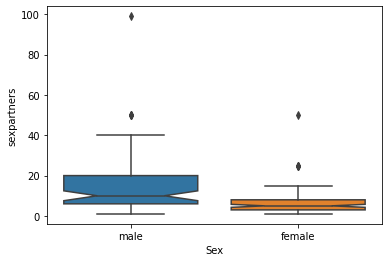

In [91]:
sns.boxplot(x='Sex', y='sexpartners', 
            data=data_clean, notch=True)

Calculating the variances between the two measures first:

In [92]:
female_filter = data_clean['Sex']=='female'
data_female=data_clean[female_filter]
data_male=data_clean[-female_filter]

male_var = np.var(data_male["sexpartners"])
female_var = np.var(data_female["sexpartners"])
                  

print(f'Female variance: {female_var:.2f}') 
print(f'Male variance: {male_var:.2f}')


Female variance: 43.23
Male variance: 239.11


In [93]:
# calculate ratio
round(male_var/female_var,2)

5.53

The ratio between the variances are >4, and as a rule of thumb, the variances do not equal to each other.

Performing two-sample t-test between two samples with different variances.

In [94]:
stats.ttest_ind(a=data_female["sexpartners"], b=data_male["sexpartners"], equal_var=False)

Ttest_indResult(statistic=-4.888773377798691, pvalue=3.832050122430137e-06)

The t test statistic is -4.96 and the corresponding two-sided p-value is 2.76e-06.

Therefore, we reject the null hypothesis that the two population means are equal. The p-value of the statstics test is significant. Males and females differ significantly in terms of their ideal number of sexual partners, with females listing way lower numbers than males.

# Question 2
## Is there a statistically significant difference between the placed importance of wealth for males and females?

In [95]:
print(round(np.var(data_female["Wealth"]),2), round(np.var(data_male["Wealth"]),2))

585.43 302.81


In [96]:
print(round(588.5229100833095/395.79535147392284,2))

1.49


In [97]:
stats.ttest_ind(a=data_female["Wealth"], b=data_male["Wealth"], equal_var=True)

Ttest_indResult(statistic=5.104461346560776, pvalue=7.983365192893977e-07)

The t test statistic is 5.10 and the corresponding two-sided p-value is 7.98e-07.

Therefore, we fail to reject the null hypothesis that the two population means are equal. The p-value of the statstics test is significant. Males and females differ significantly in terms of their ideal parter's wealth level, with females caring way more about wealth than males.

# Question 3
## Is there a statistically significant correlation between the placed importance of shared values and political orientation?
#### Shared values means whether the survey respondent values that their ideal partner has a similar ideology, morality and views in common with each other.
#### A positive relationship in the regression of placed importance of shared values on political orientation would mean, as people report being more conservative, it is more important to them to hold the same values as their romantic partner.

array([[<AxesSubplot:title={'center':'Sharedvalues'}>,
        <AxesSubplot:title={'center':'politicalorientation_1extremelyliberal_7extremelyconservative'}>]],
      dtype=object)

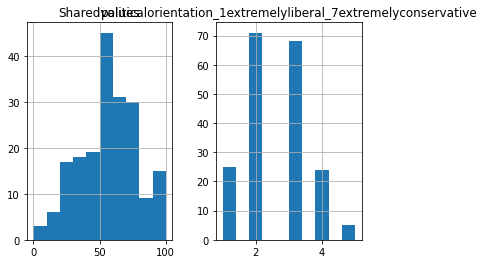

In [98]:
# understanding the variables 
# inspect histograms 

data_clean[['Sharedvalues', 
            'politicalorientation_1extremelyliberal_7extremelyconservative']].hist()

<AxesSubplot:xlabel='politicalorientation_1extremelyliberal_7extremelyconservative', ylabel='Sharedvalues'>

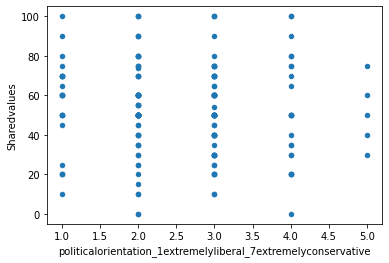

In [99]:
data_clean.plot(y='Sharedvalues', 
                x='politicalorientation_1extremelyliberal_7extremelyconservative',
                kind='scatter')

In [100]:
# doesn't look like there is a relationship

<AxesSubplot:xlabel='politicalorientation_1extremelyliberal_7extremelyconservative', ylabel='Sharedvalues'>

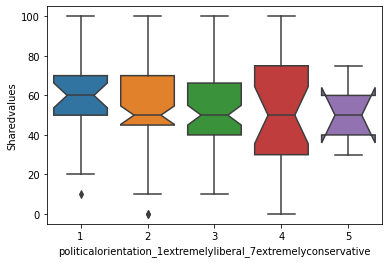

In [101]:
# another view would be a box plot
sns.boxplot(y='Sharedvalues', 
            x='politicalorientation_1extremelyliberal_7extremelyconservative',
            data=data_clean, notch=True)


In [102]:
mod = smf.ols(formula='Sharedvalues ~ politicalorientation_1extremelyliberal_7extremelyconservative', data=data_clean)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sharedvalues   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8844
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.348
Time:                        17:15:15   Log-Likelihood:                -871.78
No. Observations:                 193   AIC:                             1748.
Df Residuals:                     191   BIC:                             1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        57.2030      4.572     12.511      0.000      48.184      66.222
politicalorientation_1extremelyliberal_7extremelyconservative    -1.5796      1.680     -0.940      0.348      -4.893       1.734
==============================================================================
Omnibus:                        0.162   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.314
Skew:                          -0.017   Prob(JB):                        0.855
Kurtosis:                       2.805   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Political orientation does not have a statistically meaningful relationship with the placed value on shared values.

# Question 4
## Is there a statistically significant difference between the placed importance of socialattractiveness for people currently in a relationship and singles?

<AxesSubplot:xlabel='Relationship', ylabel='socialattractiveness'>

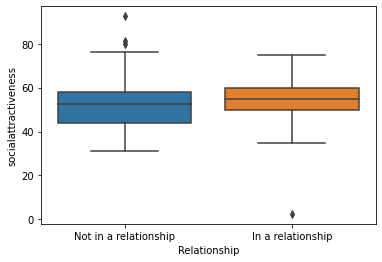

In [103]:
# first plot the data

sns.boxplot(x='Relationship',
            y='socialattractiveness',
            data=data_clean
           )

In [104]:
# select the column for the y variable
# and then use your relationship filter

relationship = data_clean['Relationship']=='In a relationship'

y_socialattract = data_clean['socialattractiveness']

# use three named pointers to capture result
# which is t statistics, p value and dfs
tstat, pvalue, df =  smstats.weightstats.ttest_ind(
    x1=y_socialattract[-relationship],
    x2=y_socialattract[relationship])

In [105]:
print(f't={tstat:0.2f} p={pvalue:0.2f} with {df} degrees of freedom')

t=-1.19 p=0.24 with 191.0 degrees of freedom


Therefore, we see that there is not a significant relationship between whether one is in a relationship and how much one cares about social attractiveness of their partner.

# Question 5
## If we focus on analyze respondents younger that 30 years old, is there still a statistically significant relationship between the placed importance on wealth and age?

In [106]:
age_filter = data_clean["Age"] <=30
data_age = data_clean[age_filter]

In [107]:
mod = smf.ols(formula='Wealth ~ Age', data=data_age)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wealth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.750
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.187
Time:                        17:15:15   Log-Likelihood:                -878.40
No. Observations:                 193   AIC:                             1761.
Df Residuals:                     191   BIC:                             1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2161     20.418     -0.060      0.953     -41.489      39.057
Age            1.2735      0.963      1.323      0.187      -0.625       3.172
==============================================================================
Omnibus:                       27.013   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.749
Skew:                           0.940   Prob(JB):                     4.69e-08
Kurtosis:                       3.814   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We here see than under the age of 30, age is not a significant factor in valuing the importance of wealth in a partner.

<div class="alert alert-info">
    
### Looking at the relationship between design traits
    
* Interesting to look at the relationship between the traits based on proportion of total assigned to each trait across participants
    
    
* One way might be to use correlation
    * Simplest is correlation between $ amounts
    * Might be more appropriate, however, to use ranked method
    
   

In [140]:
# select trait columns
trait_df = data_clean.iloc[:,:10]

In [146]:
# pearson correlation on $ values
corr_matrix=trait_df.corr()
corr_matrix

,Body,Face,Fidelity,Intelligence,Kindness,Senseofhumor,Sensitivity,Sexualskill,Sharedvalues,Wealth
Body,1.000000,0.684119,-0.195362,-0.379662,-0.377457,-0.274809,-0.366355,0.286277,-0.386304,-0.111065
Face,0.684119,1.000000,-0.212859,-0.349691,-0.391597,-0.228854,-0.433460,0.268094,-0.345764,-0.087521
Fidelity,-0.195362,-0.212859,1.000000,-0.177179,0.053283,-0.112591,0.024992,-0.254261,0.038988,-0.206791
Intelligence,-0.379662,-0.349691,-0.177179,1.000000,0.160679,0.046901,0.003551,-0.199617,0.136314,-0.065708
Kindness,-0.377457,-0.391597,0.053283,0.160679,1.000000,-0.018970,0.350201,-0.343996,0.034104,-0.334149
Senseofhumor,-0.274809,-0.228854,-0.112591,0.046901,-0.018970,1.000000,-0.084341,-0.102800,-0.030674,-0.106744
Sensitivity,-0.366355,-0.433460,0.024992,0.003551,0.350201,-0.084341,1.000000,-0.396843,0.094458,-0.102979
Sexualskill,0.286277,0.268094,-0.254261,-0.199617,-0.343996,-0.102800,-0.396843,1.000000,-0.388417,0.054009
Sharedvalues,-0.386304,-0.345764,0.038988,0.136314,0.034104,-0.030674,0.094458,-0.388417,1.000000,-0.140783
Wealth,-0.111065,-0.087521,-0.206791,-0.065708,-0.334149,-0.106744,-0.102979,0.054009,-0.140783,1.000000


In [147]:
# rank values across rows and apply spearman correlation
rank_matrix = trait_df.rank(axis=1).corr(method='spearman')
rank_matrix

,Body,Face,Fidelity,Intelligence,Kindness,Senseofhumor,Sensitivity,Sexualskill,Sharedvalues,Wealth
Body,1.000000,0.558134,-0.267857,-0.298490,-0.310657,-0.248559,-0.392435,0.307452,-0.361101,-0.189382
Face,0.558134,1.000000,-0.239702,-0.276544,-0.371062,-0.149394,-0.392670,0.216908,-0.352800,-0.189091
Fidelity,-0.267857,-0.239702,1.000000,-0.142337,-0.032927,-0.079484,0.094893,-0.214344,0.021475,-0.075367
Intelligence,-0.298490,-0.276544,-0.142337,1.000000,0.024065,-0.021766,-0.031712,-0.215751,0.135742,0.157468
Kindness,-0.310657,-0.371062,-0.032927,0.024065,1.000000,-0.021713,0.379421,-0.284663,-0.013532,-0.234971
Senseofhumor,-0.248559,-0.149394,-0.079484,-0.021766,-0.021713,1.000000,-0.014285,-0.189527,-0.033899,-0.040497
Sensitivity,-0.392435,-0.392670,0.094893,-0.031712,0.379421,-0.014285,1.000000,-0.286591,-0.013369,-0.146066
Sexualskill,0.307452,0.216908,-0.214344,-0.215751,-0.284663,-0.189527,-0.286591,1.000000,-0.361485,-0.057970
Sharedvalues,-0.361101,-0.352800,0.021475,0.135742,-0.013532,-0.033899,-0.013369,-0.361485,1.000000,-0.071482
Wealth,-0.189382,-0.189091,-0.075367,0.157468,-0.234971,-0.040497,-0.146066,-0.057970,-0.071482,1.000000


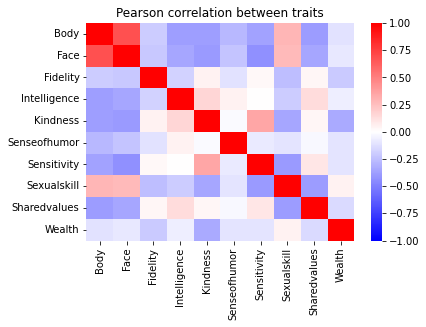

In [150]:
sns.heatmap(corr_matrix, cmap='bwr', vmax=1, vmin=-1)
plt.title('Pearson correlation between traits')
plt.show()

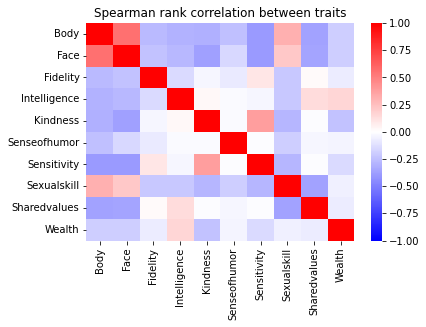

In [152]:
sns.heatmap(rank_matrix,
             cmap='bwr', vmax=1, vmin=-1)
plt.title('Spearman rank correlation between traits')
plt.show()

* Seaborn also has a `clustermap` function that orders the correlation heatmap in hierarchical clusters

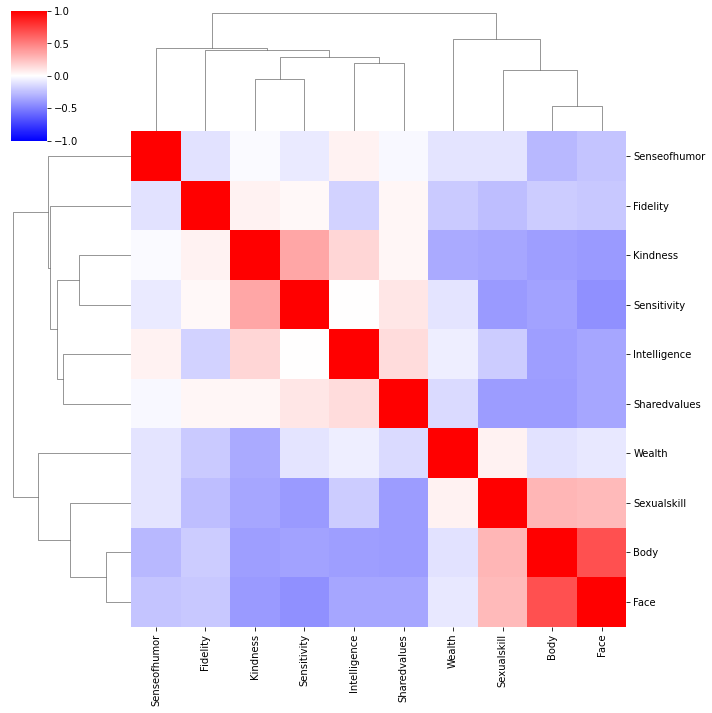

In [156]:
sns.clustermap(corr_matrix, cmap='bwr', vmax=1, vmin=-1)

* This gives some sense of how the traits group together


* Can also use the hierarchical clustering method in `scipy` to create a dendrogram

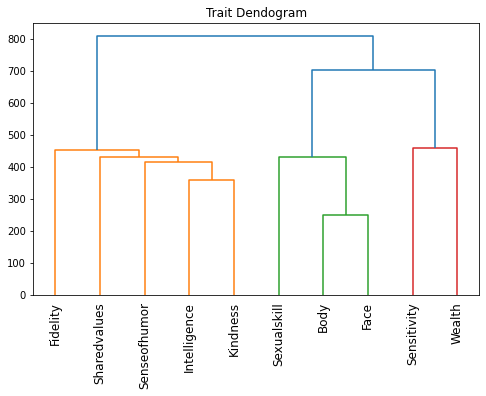

In [159]:
# need to transpose the data frame
# so traits become rows and responses columns
features = trait_df.T
labels = features.index

plt.figure(figsize=(8, 5))
plt.title("Trait Dendogram")
dend = shc.dendrogram(shc.linkage(features, method='ward'), 
                      labels=labels)

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

* Body, Face and Sexual skill cluster together
* Sensitivty and Wealth group together (although there is a negative correlation there is still an association that groups them most closely)


* Another step on would be an exploratory factor analysis


* To do this properly one would need to test various assumptions and covariance, but a quick fit using statsmodels gives: 

In [195]:
fmodel=smfactor.Factor(endog=trait_df, n_factor=3)
factor_res=fmodel.fit()

In [196]:
factor_res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Factor analysis results
=======================================================================================================
                                Eigenvalues                                                            
-------------------------------------------------------------------------------------------------------
  Body   Face  Fidelity Intelligence Kindness Senseofhumor Sensitivity Sexualskill Sharedvalues  Wealth
-------------------------------------------------------------------------------------------------------
 2.5289 1.7712   0.5645       0.3147   0.2417       0.1044      0.0523      0.0349      -0.1514 -0.6084
-------------------------------------------------------------------------------------------------------
                                                                                                       
-------------------------------------------------------------------------------------------------------
                                Communality                                                            
-------------------------------------------------------------------------------------------------------
   Body   Face  Fidelity Intelligence Kindness Senseofhumor Sensitivity Sexualskill Sharedvalues Wealth
-------------------------------------------------------------------------------------------------------
  0.8045 0.6753   0.0808       0.2090   0.3182       0.1404      0.4375      0.3434       0.1610 1.6946
-------------------------------------------------------------------------------------------------------
                                                                                                       
-------------------------------------------------------------------------------------------------------
                             Pre-rotated loadings                                                      
---------------------------------------------------------------------------------------------------------------------------------------
                                             factor 0                                 factor 1                                 factor 2
---------------------------------------------------------------------------------------------------------------------------------------
Body                                           0.8208                                  -0.2728                                  -0.2374
Face                                           0.7822                                  -0.2331                                  -0.0958
Fidelity                                      -0.2005                                  -0.1035                                  -0.1728
Intelligence                                  -0.3534                                   0.0644                                   0.2827
Kindness                                      -0.5193                                  -0.1472                                  -0.1639
Senseofhumor                                  -0.1741                                   0.0063                                   0.3318
Sensitivity                                   -0.5195                                   0.0166                                  -0.4091
Sexualskill                                    0.5212                                  -0.0130                                   0.2676
Sharedvalues                                  -0.3997                                   0.0086                                   0.0342
Wealth                                         0.2776                                   1.2670                                  -0.1100
-------------------------------------------------------------------------------------------------------
                                                                                                       
=======================================

* Looks like probably a 2 factor model is warranted from the data but can use 3 as here

* Can get the loadings of traits on each factor

In [198]:
factor_res.get_loadings_frame()

,factor 0,factor 1,factor 2
Body,0.820822,-0.272826,-0.237359
Face,0.782159,-0.233119,-0.095849
Sexualskill,0.521158,-0.013042,0.267577
Sensitivity,-0.519511,0.016556,-0.409068
Kindness,-0.519304,-0.147179,-0.163868
Sharedvalues,-0.399706,0.008563,0.034185
Intelligence,-0.353389,0.064436,0.282726
Fidelity,-0.200471,-0.103515,-0.172779
Wealth,0.277641,1.267026,-0.110048
Senseofhumor,-0.174112,0.006273,0.331804


* Factor 1 is positively weighted for physical attributes and sexual skills vs personality characteristics

* Factor 2 is wealth

* Factor 3 sense of humor


From these you can then score the responses and a factor score could be used to look for associations with demographics or other measures in the data

In [209]:
# get factor scores as data frame
factor_score_df= pd.DataFrame(factor_res.factor_scoring(), 
                              columns=['F1_Physical', 
                                       'F2_Wealth',
                                       'F3_Humor'])

# combine with data
data_clean2=pd.concat(
    [data_clean, factor_score_df], axis=1)

* Then look at associations with the factors, e.g. by sex

<AxesSubplot:xlabel='Sex', ylabel='F1_Physical'>

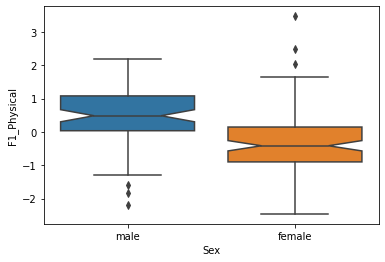

In [214]:
sns.boxplot(x='Sex', y='F1_Physical', data=data_clean2, notch=True)

<AxesSubplot:xlabel='Sex', ylabel='F2_Wealth'>

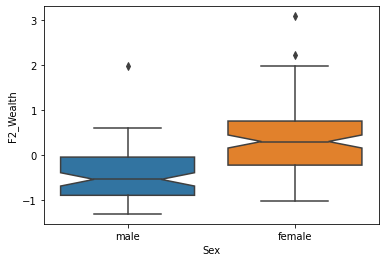

In [215]:
sns.boxplot(x='Sex', y='F2_Wealth', data=data_clean2, notch=True)

<AxesSubplot:xlabel='Sex', ylabel='F3_Humor'>

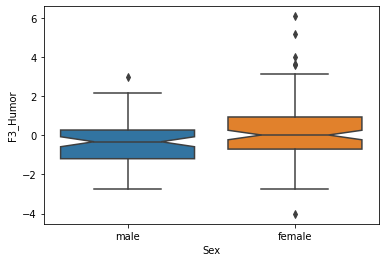

In [217]:
sns.boxplot(x='Sex', y='F3_Humor', data=data_clean2, notch=True)